In [57]:
!pip install dlib

In [58]:
import bz2
import os

# Specify the path of the compressed file
compressed_path = '/content/shape_predictor_68_face_landmarks.dat.bz2'  # Replace with the path to your compressed file

# Extract the directory path and filename from the compressed file path
directory, filename = os.path.split(compressed_path)

# Specify the path to save the extracted .dat file in the same directory
extracted_path = os.path.join(directory, filename[:-4])  # Remove the '.bz2' extension from the filename

# Extract the .dat file
with bz2.open(compressed_path, 'rb') as source, open(extracted_path, 'wb') as target:
    target.write(source.read())

# Print the path of the extracted file
print("Extracted file saved at:", extracted_path)


Extracted file saved at: /content/shape_predictor_68_face_landmarks.dat


Please enter the file path to the image you want to try on lipstick:
/content/Simply-Pretty.jpg.jpeg
What color do you want to try on:
1. Punch - #dc3753
2. Rose - #e56d7e
3. Brick red - #8b160e
4. Dusty rose - #b8696a
5. Nude - #ccac9e
6. Royal blue - #313456
3


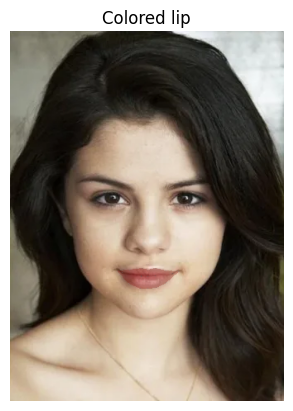

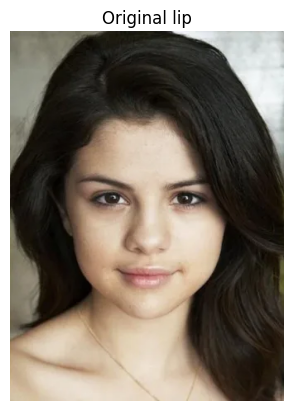

In [59]:
import cv2
import numpy as np
import dlib
import os
import matplotlib.pyplot as plt

def read_image(file_path):
    '''Read and return the image from a given file path'''
    if not os.path.isfile(file_path):
        print("The entered file path is invalid, please enter a valid file path")

    img = cv2.imread(file_path)
    return img

def get_lip_landmark(img):
    '''Finding lip landmark and return list of corresponded coordinations'''
    img = img
    detector = dlib.get_frontal_face_detector()
    predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Perform landmark detection for the whole face
    faces = detector(gray_img)
    for face in faces:
        x1, y1 = face.left(), face.top()
        x2, y2 = face.right(), face.bottom()
        landmarks = predictor(gray_img, face)
        lmPoints = []

        # Obtain landmark coordinations for lips only, since lips landmark ranging from point 48 to 68
        for n in range(48, 68):
            x = landmarks.part(n).x
            y = landmarks.part(n).y
            lmPoints.append([x, y])

    return lmPoints

def coloring_lip(imgOriginal, lmPoints, r, g, b):
    '''Coloring the lip based on given coordination'''
    img = imgOriginal.copy()

    # Obtain exact coordination of the lips
    poly1 = np.array(lmPoints[:12], np.int32).reshape((-1, 1, 2))
    poly2 = np.array(lmPoints[12:], np.int32).reshape((-1, 1, 2))

    # Fill in the color based on the coordination by fillPoly
    colored = cv2.fillPoly(img, [poly1, poly2], (r, g, b))

    # Apply blurring effect only to the lip region
    lip_region = imgOriginal.copy()
    lip_region[poly1[:, 0, 1], poly1[:, 0, 0]] = cv2.GaussianBlur(
        lip_region[poly1[:, 0, 1], poly1[:, 0, 0]], (7, 7), 0
    )
    lip_region[poly2[:, 0, 1], poly2[:, 0, 0]] = cv2.GaussianBlur(
        lip_region[poly2[:, 0, 1], poly2[:, 0, 0]], (7, 7), 0
    )

    # Blend colored lips and the original picture together
    blended_image = cv2.addWeighted(colored, 0.3, lip_region, 0.7, 0)

    # Display the result
    plt.figure()
    plt.imshow(cv2.cvtColor(blended_image, cv2.COLOR_BGR2RGB))
    plt.title("Colored lip")
    plt.axis('off')
    plt.show()

    plt.figure()
    plt.imshow(cv2.cvtColor(imgOriginal, cv2.COLOR_BGR2RGB))
    plt.title("Original lip")
    plt.axis('off')
    plt.show()

def tryon(file_path):
    '''Perform lip color tryon operation based on user's input'''
    imgOriginal = read_image(file_path)
    img = read_image(file_path)
    lmPoints = get_lip_landmark(img)

    print("What color do you want to try on:"
          + "\n1. Punch - #dc3753"
          + "\n2. Rose - #e56d7e"
          + "\n3. Brick red - #8b160e"
          + "\n4. Dusty rose - #b8696a"
          + "\n5. Nude - #ccac9e"
          + "\n6. Royal blue - #313456")

    color_choice = input()
    if color_choice == "1":
        coloring_lip(imgOriginal, lmPoints, 83, 55, 220)
    elif color_choice == "2":
        coloring_lip(imgOriginal, lmPoints, 126, 109, 229)
    elif color_choice == "3":
        coloring_lip(imgOriginal, lmPoints, 14, 22, 139)
    elif color_choice == "4":
        coloring_lip(imgOriginal, lmPoints, 106, 105, 184)
    elif color_choice == "5":
        coloring_lip(imgOriginal, lmPoints, 158, 172, 204)
    elif color_choice == "6":
        coloring_lip(imgOriginal, lmPoints, 86, 52, 49)
    else:
        print("Please enter a valid option from 1 to 6")


if __name__ == '__main__':
    print("Please enter the file path to the image you want to try on lipstick:")
    file_path = input()
    tryon(file_path)



Please enter the file path to the image you want to try on lipstick:
/content/Simply-Pretty.jpg.jpeg
What color do you want to try on:
1. Punch - #dc3753
2. Rose - #e56d7e
3. Brick red - #8b160e
4. Dusty rose - #b8696a
5. Nude - #ccac9e
6. Royal blue - #313456
1


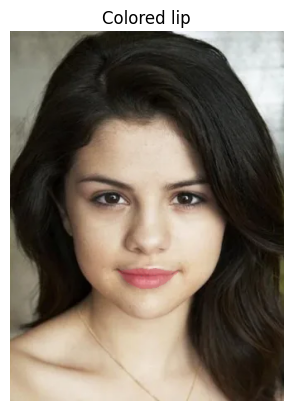

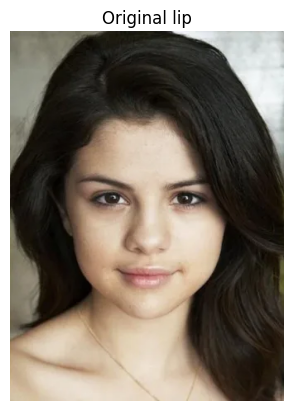

In [60]:
import cv2
import numpy as np
import dlib
import os
import matplotlib.pyplot as plt

def read_image(file_path):
    '''Read and return the image from a given file path'''
    if not os.path.isfile(file_path):
        print("The entered file path is invalid, please enter a valid file path")

    img = cv2.imread(file_path)
    return img

def get_lip_landmark(img):
    '''Finding lip landmark and return list of corresponded coordinations'''
    img = img
    detector = dlib.get_frontal_face_detector()
    predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Perform landmark detection for the whole face
    faces = detector(gray_img)
    for face in faces:
        x1, y1 = face.left(), face.top()
        x2, y2 = face.right(), face.bottom()
        landmarks = predictor(gray_img, face)
        lmPoints = []

        # Obtain landmark coordinations for lips only, since lips landmark ranging from point 48 to 68
        for n in range(48, 68):
            x = landmarks.part(n).x
            y = landmarks.part(n).y
            lmPoints.append([x, y])

    return lmPoints

def coloring_lip(imgOriginal, lmPoints, r, g, b):
    '''Coloring the lip based on given coordination'''
    img = imgOriginal.copy()

    # Obtain exact coordination of the lips
    poly1 = np.array(lmPoints[:12], np.int32).reshape((-1, 1, 2))
    poly2 = np.array(lmPoints[12:], np.int32).reshape((-1, 1, 2))

    # Fill in the color based on the coordination by fillPoly
    colored = cv2.fillPoly(img, [poly1, poly2], (r, g, b))

    # Apply blurring effect only to the lip region
    lip_region = imgOriginal.copy()
    lip_region[poly1[:, 0, 1], poly1[:, 0, 0]] = cv2.GaussianBlur(
        lip_region[poly1[:, 0, 1], poly1[:, 0, 0]], (7, 7), 0
    )
    lip_region[poly2[:, 0, 1], poly2[:, 0, 0]] = cv2.GaussianBlur(
        lip_region[poly2[:, 0, 1], poly2[:, 0, 0]], (7, 7), 0
    )

    # Blend colored lips and the original picture together
    blended_image = cv2.addWeighted(colored, 0.3, lip_region, 0.7, 0)

    # Display the result
    plt.figure()
    plt.imshow(cv2.cvtColor(blended_image, cv2.COLOR_BGR2RGB))
    plt.title("Colored lip")
    plt.axis('off')
    plt.show()

    plt.figure()
    plt.imshow(cv2.cvtColor(imgOriginal, cv2.COLOR_BGR2RGB))
    plt.title("Original lip")
    plt.axis('off')
    plt.show()

def tryon(file_path):
    '''Perform lip color tryon operation based on user's input'''
    imgOriginal = read_image(file_path)
    img = read_image(file_path)
    lmPoints = get_lip_landmark(img)

    print("What color do you want to try on:"
          + "\n1. Punch - #dc3753"
          + "\n2. Rose - #e56d7e"
          + "\n3. Brick red - #8b160e"
          + "\n4. Dusty rose - #b8696a"
          + "\n5. Nude - #ccac9e"
          + "\n6. Royal blue - #313456")

    color_choice = input()
    if color_choice == "1":
        coloring_lip(imgOriginal, lmPoints, 83, 55, 220)
    elif color_choice == "2":
        coloring_lip(imgOriginal, lmPoints, 126, 109, 229)
    elif color_choice == "3":
        coloring_lip(imgOriginal, lmPoints, 14, 22, 139)
    elif color_choice == "4":
        coloring_lip(imgOriginal, lmPoints, 106, 105, 184)
    elif color_choice == "5":
        coloring_lip(imgOriginal, lmPoints, 158, 172, 204)
    elif color_choice == "6":
        coloring_lip(imgOriginal, lmPoints, 86, 52, 49)
    else:
        print("Please enter a valid option from 1 to 6")


if __name__ == '__main__':
    print("Please enter the file path to the image you want to try on lipstick:")
    file_path = input()
    tryon(file_path)



Please enter the file path to the image you want to try on lipstick:
/content/Simply-Pretty.jpg.jpeg
What color do you want to try on:
1. Punch - #dc3753
2. Rose - #e56d7e
3. Brick red - #8b160e
4. Dusty rose - #b8696a
5. Nude - #ccac9e
6. Royal blue - #313456
6


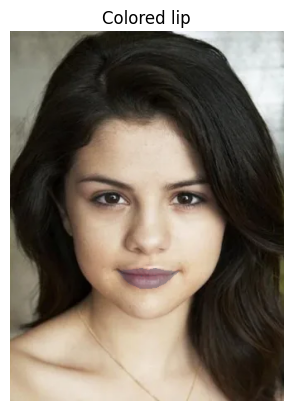

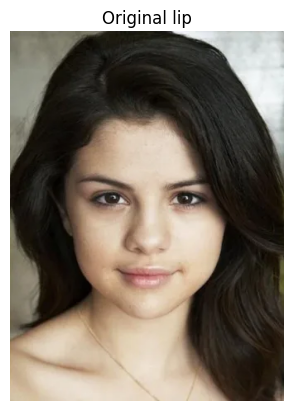

In [61]:
import cv2
import numpy as np
import dlib
import os
import matplotlib.pyplot as plt

def read_image(file_path):
    '''Read and return the image from a given file path'''
    if not os.path.isfile(file_path):
        print("The entered file path is invalid, please enter a valid file path")

    img = cv2.imread(file_path)
    return img

def get_lip_landmark(img):
    '''Finding lip landmark and return list of corresponded coordinations'''
    img = img
    detector = dlib.get_frontal_face_detector()
    predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Perform landmark detection for the whole face
    faces = detector(gray_img)
    for face in faces:
        x1, y1 = face.left(), face.top()
        x2, y2 = face.right(), face.bottom()
        landmarks = predictor(gray_img, face)
        lmPoints = []

        # Obtain landmark coordinations for lips only, since lips landmark ranging from point 48 to 68
        for n in range(48, 68):
            x = landmarks.part(n).x
            y = landmarks.part(n).y
            lmPoints.append([x, y])

    return lmPoints

def coloring_lip(imgOriginal, lmPoints, r, g, b):
    '''Coloring the lip based on given coordination'''
    img = imgOriginal.copy()

    # Obtain exact coordination of the lips
    poly1 = np.array(lmPoints[:12], np.int32).reshape((-1, 1, 2))
    poly2 = np.array(lmPoints[12:], np.int32).reshape((-1, 1, 2))

    # Fill in the color based on the coordination by fillPoly
    colored = cv2.fillPoly(img, [poly1, poly2], (r, g, b))

    # Apply blurring effect only to the lip region
    lip_region = imgOriginal.copy()
    lip_region[poly1[:, 0, 1], poly1[:, 0, 0]] = cv2.GaussianBlur(
        lip_region[poly1[:, 0, 1], poly1[:, 0, 0]], (7, 7), 0
    )
    lip_region[poly2[:, 0, 1], poly2[:, 0, 0]] = cv2.GaussianBlur(
        lip_region[poly2[:, 0, 1], poly2[:, 0, 0]], (7, 7), 0
    )

    # Blend colored lips and the original picture together
    blended_image = cv2.addWeighted(colored, 0.3, lip_region, 0.7, 0)

    # Display the result
    plt.figure()
    plt.imshow(cv2.cvtColor(blended_image, cv2.COLOR_BGR2RGB))
    plt.title("Colored lip")
    plt.axis('off')
    plt.show()

    plt.figure()
    plt.imshow(cv2.cvtColor(imgOriginal, cv2.COLOR_BGR2RGB))
    plt.title("Original lip")
    plt.axis('off')
    plt.show()

def tryon(file_path):
    '''Perform lip color tryon operation based on user's input'''
    imgOriginal = read_image(file_path)
    img = read_image(file_path)
    lmPoints = get_lip_landmark(img)

    print("What color do you want to try on:"
          + "\n1. Punch - #dc3753"
          + "\n2. Rose - #e56d7e"
          + "\n3. Brick red - #8b160e"
          + "\n4. Dusty rose - #b8696a"
          + "\n5. Nude - #ccac9e"
          + "\n6. Royal blue - #313456")

    color_choice = input()
    if color_choice == "1":
        coloring_lip(imgOriginal, lmPoints, 83, 55, 220)
    elif color_choice == "2":
        coloring_lip(imgOriginal, lmPoints, 126, 109, 229)
    elif color_choice == "3":
        coloring_lip(imgOriginal, lmPoints, 14, 22, 139)
    elif color_choice == "4":
        coloring_lip(imgOriginal, lmPoints, 106, 105, 184)
    elif color_choice == "5":
        coloring_lip(imgOriginal, lmPoints, 158, 172, 204)
    elif color_choice == "6":
        coloring_lip(imgOriginal, lmPoints, 86, 52, 49)
    else:
        print("Please enter a valid option from 1 to 6")


if __name__ == '__main__':
    print("Please enter the file path to the image you want to try on lipstick:")
    file_path = input()
    tryon(file_path)

